In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Generating the Dataset for Testing

In [5]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random data for x1, x2, x3
x1 = 2 * np.random.rand(1000, 1)
x2 = 3 * np.random.rand(1000, 1)
x3 = 4 * np.random.rand(1000, 1)
x4 = 5 * np.random.rand(1000, 1)

# Generate random noise
noise = np.random.randn(1000, 1) **4

# Generate y values with a polynomial relationship using x1, x2, x3
y = 2 + 3 * x1**2 + 2 * x2**4 + 1.5 * x3 + 4 * x4**2 + noise

# Create a DataFrame with multiple features
data = pd.DataFrame({
    'X1': x1.flatten(),
    'X2': x2.flatten(),
    'X3': x3.flatten(),
    'X4': x4.flatten(),
    'Y': y.flatten()
})

# Display the first few rows of the DataFrame
print(data.head())


         X1        X2        X3        X4           Y
0  0.749080  0.555399  1.046823  3.363515   53.813071
1  1.901429  1.625703  0.987915  3.983407   91.777854
2  1.463988  2.618838  3.625018  1.252339  114.348866
3  1.197317  2.196675  0.998185  3.124370   93.456522
4  0.312037  2.419683  1.087799  2.858730  105.216526


# Basic EDA

<Axes: ylabel='Density'>

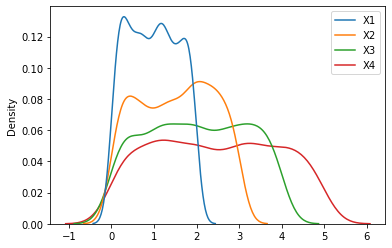

In [6]:
sns.kdeplot(data.drop('Y', axis=1))

<Axes: >

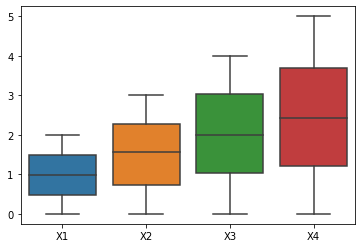

In [7]:
sns.boxplot(data.drop('Y', axis=1))

<Axes: >

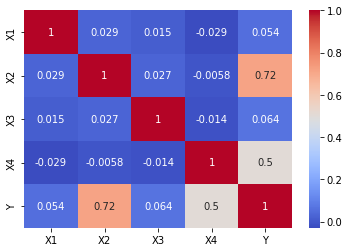

In [8]:
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

- The correlation heatmap shows a strong positive correlation between variables X2 and Y
- A weak correaltion is also Observed  between X4 and Y. 

But as we know there is an underlying pattern to the data, let's see if a Linear model can figure out the relationship

Let's examine the faetures and their relationship with Y!

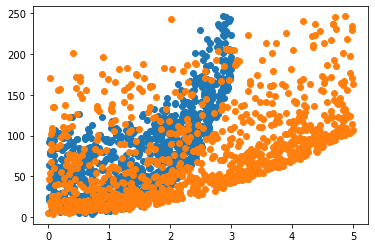

In [9]:
plt.scatter(data['X2'], data['Y'])
plt.scatter(data['X4'], data['Y'])

### The relationship seems to go in a curve and we definately know  that it is not linear.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Train Test Split, 70/30 split here

In [13]:
X = data.drop('Y', axis=1)
y = data['Y']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Lets just test it with Linear Regression and see the performance

In [14]:
## Normal Linear Regression
normal_model =  LinearRegression()
normal_model.fit(X_train, y_train)
y_pred_l =  normal_model.predict(X_test)
print(f'R2: {normal_model.score(X_test, y_test)}, MSE: {mean_squared_error(y_test, y_pred_l)}', ':(')

R2: 0.7676879934364671, MSE: 635.0810078482035 :(


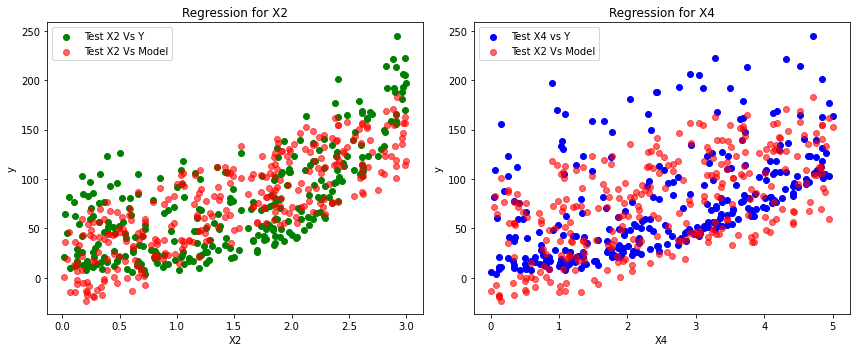

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot and regression model
axs[0].scatter(X_test['X2'], y_test, label='Test X2 Vs Y', color='green')
axs[0].scatter(X_test['X2'], y_pred_l, color='red', label='Test X2 Vs Model', alpha=0.6)
axs[0].set_xlabel('X2')
axs[0].set_ylabel('y')
axs[0].set_title('Regression for X2')
axs[0].legend()

axs[1].scatter(X_test['X4'], y_test, label='Test X4 vs Y', color='blue')
axs[1].scatter(X_test['X4'], y_pred_l, color='red', label='Test X2 Vs Model', alpha=0.6)
axs[1].set_xlabel('X4')
axs[1].set_ylabel('y')
axs[1].set_title('Regression for X4')
axs[1].legend()

plt.tight_layout()
plt.show()


It is pretty evident that the Linear model is missing a lot of pattern from data

In [22]:
# Fit a polynomial regression model
poly_features = PolynomialFeatures(degree=4)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Transform the test set features
X_test_poly = poly_features.transform(X_test)

# Make predictions on the test set
y_pred = poly_model.predict(X_test_poly)

#  R2 on training  data
poly_model.score(X_train_poly, y_train)

0.966970719730428

#### For Test Data

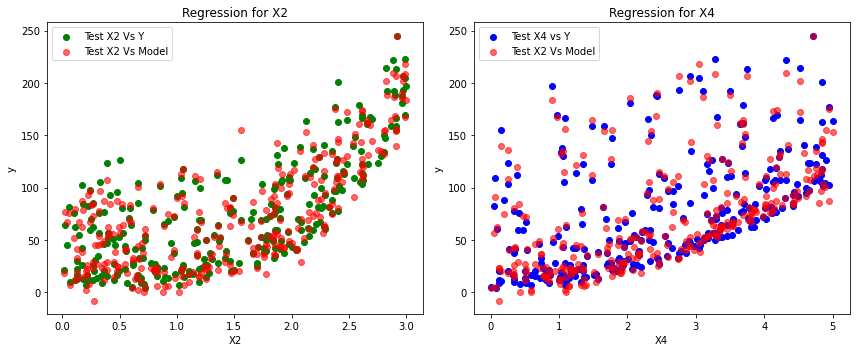

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot and regression model
axs[0].scatter(X_test['X2'], y_test, label='Test X2 Vs Y', color='green')
axs[0].scatter(X_test['X2'], y_pred, color='red', label='Test X2 Vs Model', alpha=0.6)
axs[0].set_xlabel('X2')
axs[0].set_ylabel('y')
axs[0].set_title('Regression for X2')
axs[0].legend()

axs[1].scatter(X_test['X4'], y_test, label='Test X4 vs Y', color='blue')
axs[1].scatter(X_test['X4'], y_pred, color='red', label='Test X2 Vs Model', alpha=0.6)
axs[1].set_xlabel('X4')
axs[1].set_ylabel('y')
axs[1].set_title('Regression for X4')
axs[1].legend()

plt.tight_layout()
plt.show()


In [17]:

print(f'For Test : MSE {mean_squared_error(y_test, y_pred)}, R2 {r2_score(y_test, y_pred)}', ':D')


For Test : MSE 142.61417777659958, R2 0.9478318743683654 :D


The test score is lower than training, this is common in real life but it can also be due to overfitting, as we have chosen a high degree polynomial which has exploded the number of features

In [25]:
X_train_poly.shape

(700, 70)

# Hyperparameter Tuning: Regularisation

In [19]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

### Ridge Regression

Ridge regression is a regularization technique used to prevent overfitting in linear regression models by adding a penalty term to the cost function. It is particularly useful when dealing with multicollinearity, where predictor variables are highly correlated. 

### Key Points:
- **Objective**: Minimize the sum of squared residuals along with a penalty term that is the L2 norm of the coefficients multiplied by a regularization parameter (alpha).
- **Regularization**: Helps in shrinking the coefficients towards zero, reducing model complexity and variance.
- **Bias-Variance Tradeoff**: Ridge regression helps in finding a balance between bias and variance by penalizing large coefficients.
- **Parameter Tuning**: The regularization parameter (alpha) controls the strength of regularization, with higher values leading to more shrinkage.
- **Feature Selection**: Ridge regression does not perform feature selection but can shrink coefficients close to zero, making it useful for models with many predictors.


### Mathematical Notations:

In Ridge regression, the cost function is modified by adding a penalty term that includes the squared magnitude of the coefficients:

The Ridge regression cost function is defined as:

$$ J(\theta) = \sum_{i=1}^{m} (y^{(i)} - h_{\theta}(x^{(i)}))^2 + \lambda \sum_{j=1}^{n} \theta_j^2 $$

Regularization parameter $$ \lambda \sum_{j=1}^{n} \theta_j^2 $$

Higher the regularization, lesser the weights disbursed to the model, hence working to optimise the model from overfitting to optimal fit


In [35]:
# Fit a polynomial regression model with Ridge regularization
alpha = 0.1  # Regularization parameter
poly_model_ridge = make_pipeline(PolynomialFeatures(degree=4), StandardScaler(), Ridge(alpha=alpha))
poly_model_ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = poly_model_ridge.predict(X_test)

# Evaluate the model
r2_ridge = poly_model_ridge.score(X_test, y_test)
mse = mean_squared_error(y_test,y_pred_ridge)
print("R2 Score with Ridge regularization:", r2_ridge, ';D')
print("MSE Score with Ridge regularization:", mse, ';D')


R2 Score with Ridge regularization: 0.9659016305005385 ;D
MSE Score with Ridge regularization: 93.21613285526061 ;D


As we can see the MSE and R2 have significantly improved from the initial model 

Let's See how R2 varies with different values of alpha

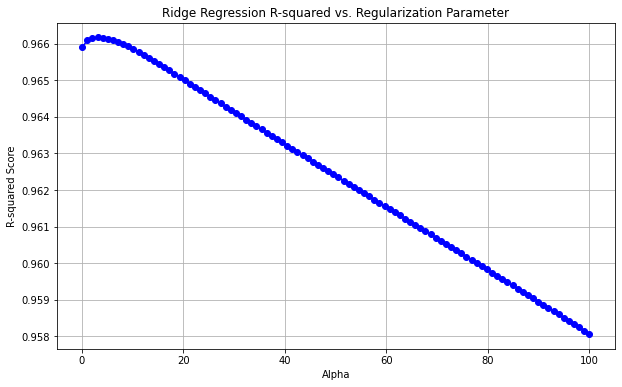

In [37]:
# Initialize lists to store R-squared scores
alphas = np.linspace(0.1, 100, 100)
r2_scores = []

# Fit Ridge regression models with different alpha values and calculate R-squared scores
for alpha in alphas:
    poly_model_ridge = make_pipeline(PolynomialFeatures(degree=4), StandardScaler(), Ridge(alpha=alpha))
    poly_model_ridge.fit(X_train, y_train)
    y_pred_ridge = poly_model_ridge.predict(X_test)
    r2 = poly_model_ridge.score(X_test, y_test)
    r2_scores.append(r2)

# Plot the R-squared scores against different alpha values
plt.figure(figsize=(10, 6))
plt.plot(alphas, r2_scores, marker='o', color='b')
plt.title('Ridge Regression R-squared vs. Regularization Parameter')
plt.xlabel('Alpha')
plt.ylabel('R-squared Score')
plt.grid(True)
plt.show()



### Lasso Regression

Lasso regression, short for Least Absolute Shrinkage and Selection Operator, is another regularization technique used in linear regression to prevent overfitting and perform feature selection by adding a penalty term to the cost function. It is particularly effective when dealing with high-dimensional datasets and selecting important features.

### Key Points:
- **Objective**: Minimize the sum of squared residuals along with a penalty term that is the L1 norm of the coefficients multiplied by a regularization parameter (alpha).
- **Regularization**: Lasso regression shrinks the coefficients towards zero and encourages sparsity by setting some coefficients to exactly zero, effectively performing feature selection.
- **Bias-Variance Tradeoff**: Lasso regression helps in balancing bias and variance by penalizing and shrinking coefficients, leading to a simpler model.
- **Parameter Tuning**: The regularization parameter (alpha) controls the strength of regularization, with higher values promoting more coefficients to be set to zero.
- **Feature Selection**: Lasso regression automatically selects important features by setting less important ones to zero, aiding in model interpretability and efficiency.

### Mathematical Notations:

In Lasso regression, the cost function is modified by adding a penalty term that includes the absolute sum of the coefficients:

The Lasso regression cost function is defined as:

$$ J(\theta) = \sum_{i=1}^{m} (y^{(i)} - h_{\theta}(x^{(i)}))^2 + \lambda \sum_{j=1}^{n} |\theta_j| $$

Regularization parameter $$ \lambda \sum_{j=1}^{n} |\theta_j| $$

A higher regularization parameter leads to more coefficients being shrunk to zero, facilitating feature selection and reducing model complexity.

In [36]:
from sklearn.linear_model import Lasso

# Fit a polynomial regression model with Lasso regularization
alpha = 0.1  # Regularization parameter
poly_model_lasso = make_pipeline(PolynomialFeatures(degree=4), StandardScaler(), Lasso(alpha=alpha))
poly_model_lasso.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = poly_model_lasso.predict(X_test)

# Evaluate the model
r2_lasso = poly_model_lasso.score(X_test, y_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("R2 Score with Lasso regularization:", r2_lasso)
print("MSE Score with Lasso regularization:", mse_lasso)


R2 Score with Lasso regularization: 0.9669214308389635
MSE Score with Lasso regularization: 90.42826219669516


Let's See how R2 varies with different values of alpha

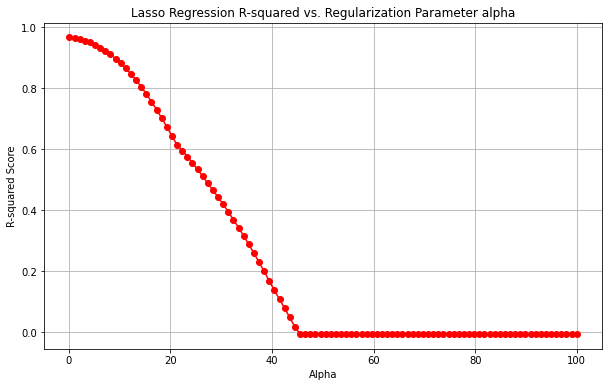

In [40]:
# Initialize lists to store R-squared scores
alphas = np.linspace(0.1, 100, 100)
r2_scores = []

# Fit Lasso regression models with different alpha values and calculate R-squared scores
for alpha in alphas:
    poly_model_lasso = make_pipeline(PolynomialFeatures(degree=4), StandardScaler(), Lasso(alpha=alpha))
    poly_model_lasso.fit(X_train, y_train)
    y_pred_lasso = poly_model_lasso.predict(X_test)
    r2 = poly_model_lasso.score(X_test, y_test)
    r2_scores.append(r2)

# Plot the R-squared scores against different alpha values
plt.figure(figsize=(10, 6))
plt.plot(alphas, r2_scores, marker='o', color='r')
plt.title('Lasso Regression R-squared vs. Regularization Parameter alpha')
plt.xlabel('Alpha')
plt.ylabel('R-squared Score')
plt.grid(True)
plt.show()